1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1


in iteration 2
in iteration 3


in iteration 4
in iteration 5
in iteration 6


in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
2
[  0.  10.   4.  11.  14.   9.   8.   0.   1.   2.   7.   6.   0.   5.  13.
  12.   3.]
[ 101.30640469]
15
<class 'numpy.ndarray'>


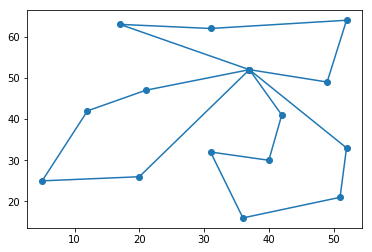

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
0
[  0.   1.   2.   7.   6.   0.  10.   8.   9.  14.   4.  11.   0.   5.  13.
   3.  12.]
[ 101.84936778]
15
<class 'numpy.ndarray'>


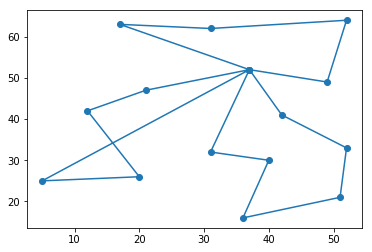

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
2
[  0.  10.   4.  11.   3.  12.  13.   0.   1.   8.   9.  14.   0.   7.   6.
   5.   2.]
[ 105.35679113]


15
<class 'numpy.ndarray'>


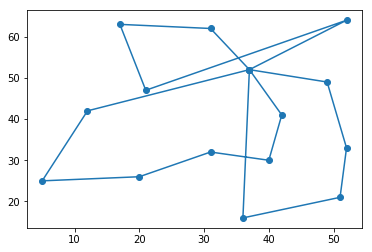

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
1
[  0.  10.   1.   2.   6.   7.   0.   5.  13.  12.   3.  11.   0.   8.   9.
   4.  14.]
[ 101.03580785]
15


<class 'numpy.ndarray'>


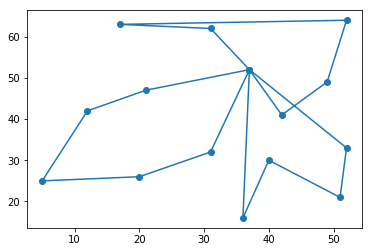

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
8
[  0.  10.   4.   8.   9.  14.   0.   1.   2.   7.   6.   5.   0.  11.   3.
  12.  13.]


[ 99.49957183]
15
<class 'numpy.ndarray'>


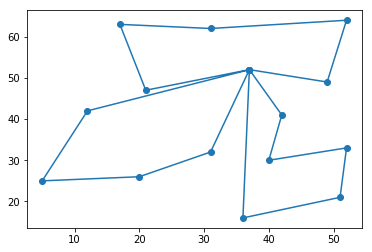

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
3
[  0.  10.  11.   3.  12.  13.   5.   0.   1.   2.   7.   6.   0.   4.   8.
   9.  14.]
[ 99.30243791]


15
<class 'numpy.ndarray'>


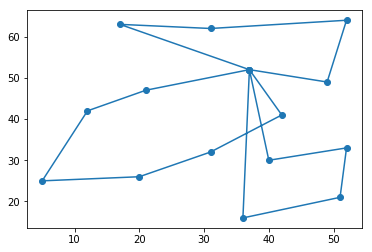

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
3
[  0.   5.  13.  12.   3.  11.   4.   0.  10.   8.   9.  14.   0.   7.   6.
   1.   2.]
[ 104.4298693]


15
<class 'numpy.ndarray'>


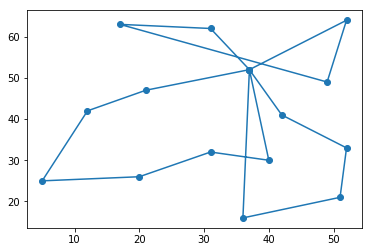

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
0
[  0.  10.   4.  11.  14.   9.   8.   0.   1.   2.   7.   6.   0.   5.  13.
  12.   3.]


[ 101.30640469]
15
<class 'numpy.ndarray'>


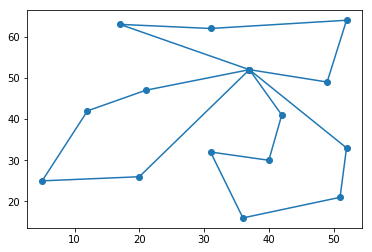

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
1
[  0.  10.   4.  11.  14.   9.   8.   0.   1.   2.   7.   6.   0.   5.  13.
   3.  12.]


[ 101.84936778]
15
<class 'numpy.ndarray'>


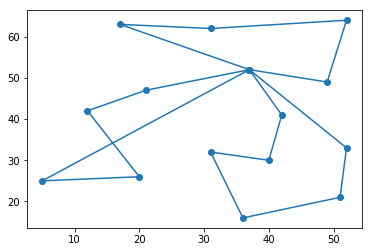

1
 in excution of no diagnal cross avoidence
in iteration 0
in iteration 1
in iteration 2


in iteration 3
in iteration 4
in iteration 5


in iteration 6
in iteration 7
in iteration 8


in iteration 9
in iteration 10
in iteration 11


in iteration 12
in iteration 13
in iteration 14


in iteration 15
in iteration 16
in iteration 17


in iteration 18
in iteration 19
0
[  0.  10.   4.  11.   3.  12.  13.   0.   1.   8.   9.  14.   0.   7.   5.
   6.   2.]


[ 105.35679113]
15
<class 'numpy.ndarray'>


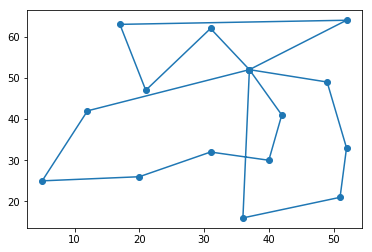

In [23]:
import sys
sys.path.append("/home/cheng/PycharmProjects/TSP/src/")
sys.path.append("/home/cheng/PycharmProjects/TSP/src/TravelingSalesmanProblem/")
sys.path.append("/home/cheng/PycharmProjects/TSP/")

project_path = "/home/cheng/PycharmProjects/TSP/"

from TravelingSalesmanProblem.AntColonyAlgorithmForMTSP import *

for i in range( 10 ):
    mtsp = AntColonyAlgorithmForMTSP(iter_max= 20, num= 3, K = 4, L = 6,
                datasets= "/home/cheng/PycharmProjects/TSP/datasets/eil15")
    mtsp.excution()
    mtsp.print_information()
    mtsp.plot()

1
<class 'numpy.ndarray'>


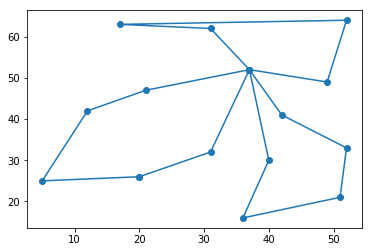

In [20]:
route = [1,11,9,10,15,5,1,12,4,4,13,14,6,1,8,7,3,2]
route = [ int( i -1 ) for i in route ]
mtsp = AntColonyAlgorithmForMTSP(iter_max= 20, num= 3, K = 3, L = 7,
                datasets= "/home/cheng/PycharmProjects/TSP/datasets/eil15")
import numpy as np
route = np.array( route )
mtsp.plot_route( route )